In [2]:
import pandas as pd
import jieba
from collections import Counter

data = pd.read_excel('./douban_comments.xlsx')
data_comments = data['评论'] # 或者直接import爬虫时的列表变量
all_words = Counter() # 创建计数器对象

In [3]:
def count_words(text, all_words):
    words_raw = jieba.cut(text) # 默认jieba精确模式
    with open('stopwords_cn.txt', "r", encoding="utf-8") as f:
        stop = f.read().split()
    stop += [" ", "\n", "\t"]
    words = [word for word in words_raw if word not in stop and len(word) >= 2]
    # 去除停用词，对于列表可以用列表生成式；对于dataframe或者Series可以调用apply函数
    all_words.update(words)
    # 统计词频，对于dataframe或者Series可以调用value_counts函数

In [4]:
# 重新初始化计数器
all_words = Counter()

for comment in data_comments:
    count_words(comment, all_words)

del all_words['高启']
del all_words['真的']
del all_words['这剧']
del all_words['一部']

top_100 = all_words.most_common(100)
print(top_100)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LENOVO\AppData\Local\Temp\jieba.cache
Loading model cost 0.559 seconds.
Prefix dict has been built successfully.


[('张译', 66), ('张颂文', 48), ('安欣', 42), ('警察', 36), ('演技', 36), ('角色', 32), ('人物', 24), ('扫黑', 22), ('剧情', 22), ('反派', 16), ('狂飙', 16), ('26', 16), ('好看', 16), ('国产', 16), ('现实', 16), ('台词', 14), ('精彩', 14), ('希望', 14), ('李响', 14), ('观众', 14), ('主旋律', 12), ('少年', 12), ('社会', 12), ('烂尾', 12), ('之间', 12), ('说话', 12), ('题材', 12), ('样子', 10), ('立冬', 10), ('大佬', 10), ('对不上', 10), ('不错', 10), ('演员', 10), ('孟德海', 10), ('黑社会', 10), ('环境', 10), ('这是', 10), ('人设', 10), ('主角', 10), ('感觉', 10), ('叙事', 10), ('编剧', 10), ('年轻', 10), ('坏人', 10), ('表演', 8), ('2000', 8), ('刻画', 8), ('吴刚', 8), ('演绎', 8), ('一步', 8), ('张颂', 8), ('口音', 8), ('结束', 8), ('12', 8), ('13', 8), ('27', 8), ('配音', 8), ('期待', 8), ('值得', 8), ('假大空', 8), ('名义', 8), ('剧本', 8), ('故事', 8), ('导演', 8), ('一堆', 8), ('是因为', 8), ('审查', 8), ('塑造', 8), ('对付', 8), ('只能', 8), ('dang', 8), ('地方', 8), ('细节', 6), ('特别', 6), ('演啥', 6), ('痕迹', 6), ('黄瑶', 6), ('老默', 6), ('强行', 6), ('删改', 6), ('国剧', 6), ('二十年', 6), ('涉黑', 6), ('飙戏', 6), ('时间', 6), ('2021',

In [5]:
# pyecharts绘制词云图
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import ThemeType

cloud = WordCloud(init_opts = opts.InitOpts(bg_color = 'white', theme = ThemeType.WONDERLAND))
cloud.add(series_name = "kuangbiao_wordcloud", # 可以留空，不会显示在图上，但不能不写
          data_pair = top_100,
          word_size_range = [10, 100])
cloud.set_global_opts(title_opts = opts.TitleOpts(title = "《狂飙》豆瓣热评词云图"), toolbox_opts = opts.ToolboxOpts(is_show = True))
cloud.render("kuangbiao_wordcloud.html")

'd:\\learn_more_python\\BA\\my_ba_code\\1022ex_douban\\kuangbiao_wordcloud.html'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_313544\4132884863.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  back_picture = imread("gun.jpg")


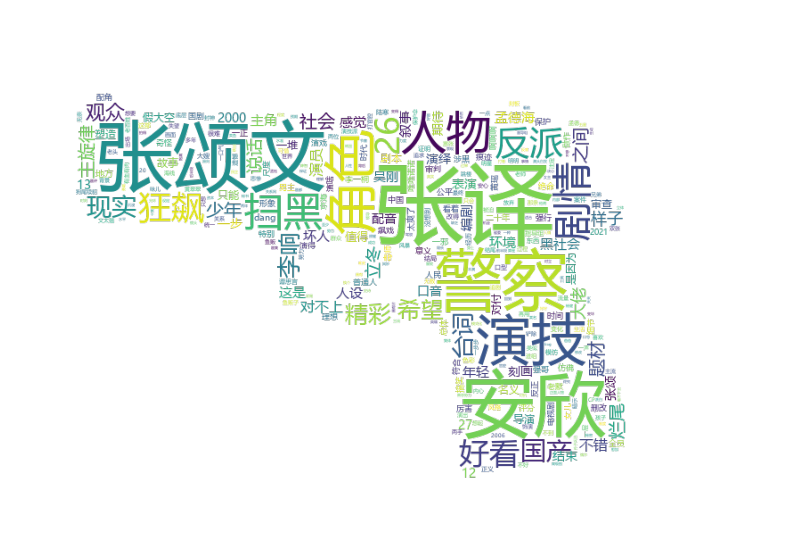

In [27]:
# matplotlib绘制词云图
from wordcloud import WordCloud
from imageio import imread
import matplotlib.pyplot as plt

back_picture = imread("gun.jpg")
cloud_set = WordCloud(font_path = "msyh.ttc",
                      background_color = None,
                      mode = "RGBA",
                      mask = back_picture,
                      max_words = len(all_words),
                      max_font_size = 100,
                      random_state = 1)
cloud = cloud_set.fit_words(all_words)
plt.figure(figsize = (10, 10))
plt.imshow(cloud)
plt.axis("off")
plt.show()